In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('E:/ML/data/Online Retail.xlsx')

In [3]:
df.shape

(541909, 8)

In [4]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


# 2. Product Analytics

In [7]:
df= df[df['Quantity']>0]
df= df[df['UnitPrice']>0]
df=df[df['InvoiceDate']<'2011-12-01']

Text(0.5, 0.98, '')

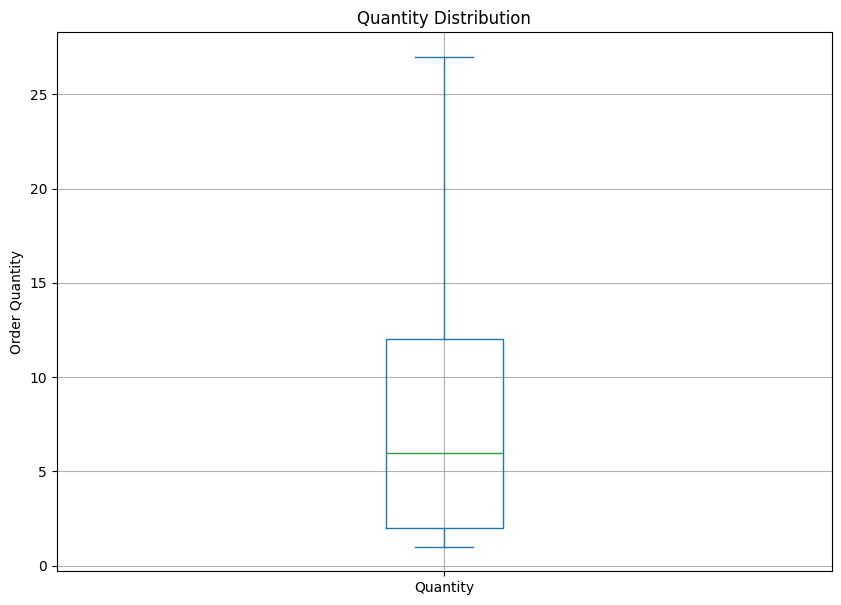

In [22]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10,7),
  )


ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")

In [10]:
df['CustomerID'].isnull().sum()

np.int64(0)

In [9]:
df.dropna(subset=['CustomerID'], inplace=True)

In [11]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,380580.000000
mean,12.823582
std,127.733673
min,1.000000
25%,2.000000
50%,6.000000
75%,12.000000
max,74215.000000


In [12]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

#### - Time-series Repeat Customers

In [13]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max,
}).reset_index()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10868\1545660781.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ).agg({
C:\Users\Admin\AppData\Local\Temp\ipykernel_10868\1545660781.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg({


In [14]:
invoice_customer_df

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom
...,...,...,...,...,...
17779,579868,2011-11-30 16:43:00,328.32,15544.0,United Kingdom
17780,579870,2011-11-30 16:47:00,292.41,12437.0,France
17781,579872,2011-11-30 16:54:00,278.82,14085.0,United Kingdom
17782,579881,2011-11-30 17:22:00,905.52,12429.0,Denmark


In [15]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
   pd.Grouper(freq='ME'), 'CustomerID']).filter(lambda x: len(x) > 1)['CustomerID'].resample('ME').nunique()

In [17]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    152
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: ME, Name: CustomerID, dtype: int64

In [18]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('ME').nunique()

In [19]:
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1664
Freq: ME, Name: CustomerID, dtype: int64

In [24]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.052770
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.512019
Freq: ME, Name: CustomerID, dtype: float64

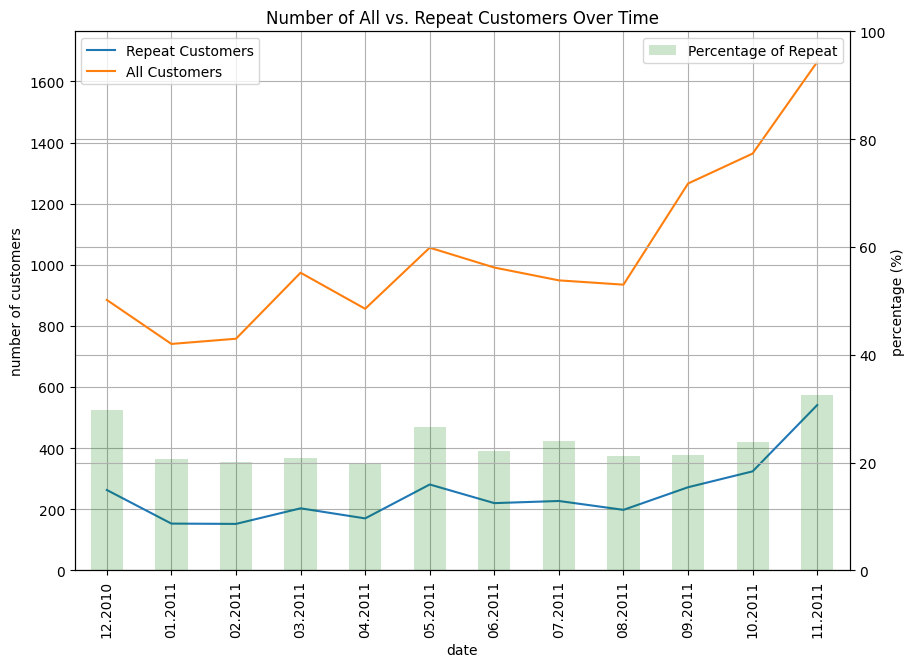

In [23]:

ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)


ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=90, ha='right'
)

plt.show()

#### - Revenue from Repeat Customers

In [25]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='MS'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('MS')['Sales'].sum()

In [26]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-01    359170.60
2011-01-01    222124.00
2011-02-01    191067.27
2011-03-01    267390.48
2011-04-01    195474.18
2011-05-01    378197.04
2011-06-01    376307.26
2011-07-01    317475.00
2011-08-01    317134.25
2011-09-01    500663.36
2011-10-01    574006.87
2011-11-01    713775.85
Freq: MS, Name: Sales, dtype: float64

In [27]:
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('MS').sum()
monthly_revenue_df

InvoiceDate
2010-12-01     572713.890
2011-01-01     569445.040
2011-02-01     447137.350
2011-03-01     595500.760
2011-04-01     469200.361
2011-05-01     678594.560
2011-06-01     661213.690
2011-07-01     600091.011
2011-08-01     645343.900
2011-09-01     952838.382
2011-10-01    1039318.790
2011-11-01    1161817.380
Freq: MS, Name: Sales, dtype: float64

In [29]:
monthly_rev_perc_repeat_customers_df = (monthly_rev_repeat_customers_df/monthly_revenue_df )* 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-01    62.713792
2011-01-01    39.007101
2011-02-01    42.731226
2011-03-01    44.901787
2011-04-01    41.661132
2011-05-01    55.732401
2011-06-01    56.911595
2011-07-01    52.904475
2011-08-01    49.141899
2011-09-01    52.544416
2011-10-01    55.229144
2011-11-01    61.436148
Freq: MS, Name: Sales, dtype: float64

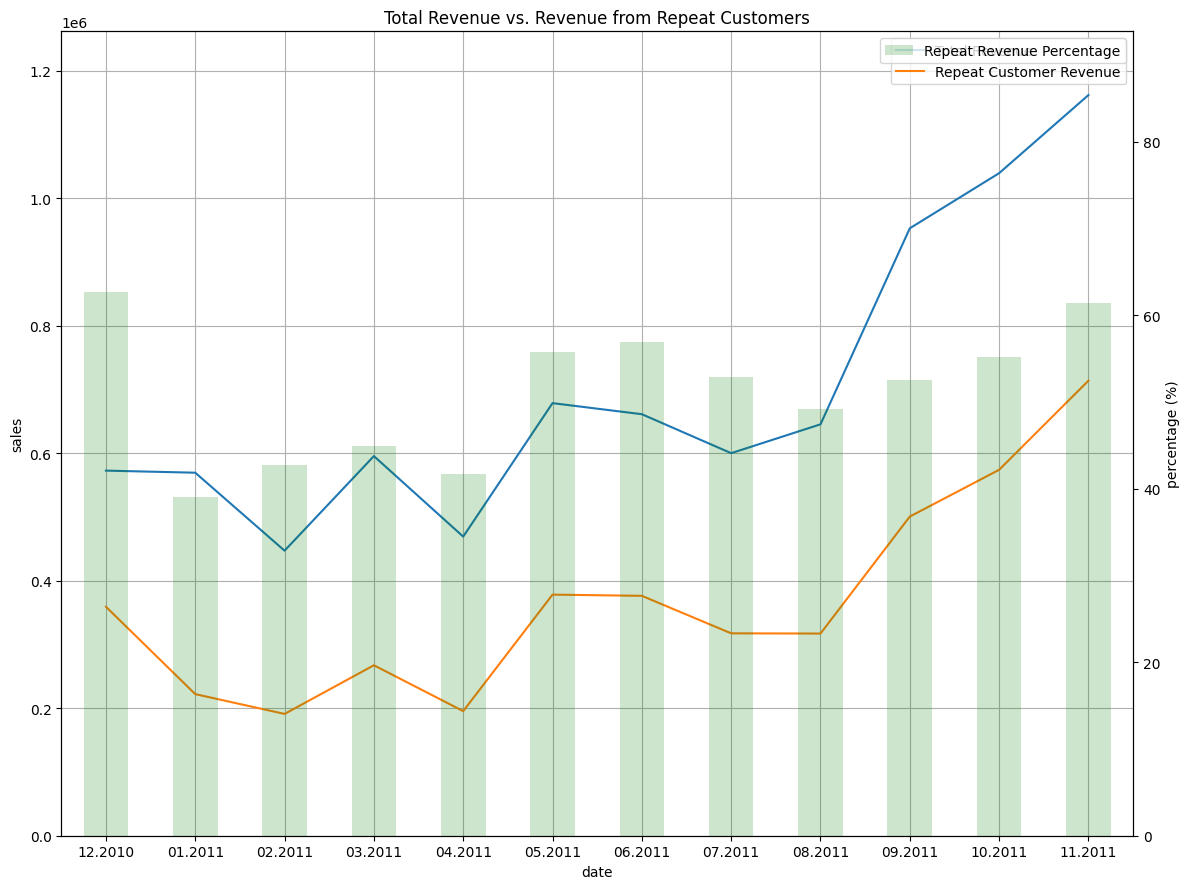

In [30]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index],
    rotation=45
)

plt.tight_layout()
plt.show()

#### - Popular Items Over Time

In [31]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='ME'), 'StockCode'
    ])['Quantity'].sum().reset_index()
)
date_item_df

,InvoiceDate,StockCode,Quantity
0,2010-12-31,10002,224
1,2010-12-31,10120,16
2,2010-12-31,10125,143
3,2010-12-31,10133,123
4,2010-12-31,10135,366
...,...,...,...
28229,2011-11-30,BANK CHARGES,2
28230,2011-11-30,C2,22
28231,2011-11-30,DOT,4
28232,2011-11-30,M,3890


In [32]:
last_month_sorted_df = date_item_df[date_item_df['InvoiceDate'] == date_item_df['InvoiceDate'].max()].sort_values(
    by='Quantity', ascending=False
).reset_index() 
last_month_sorted_df

,index,InvoiceDate,StockCode,Quantity
0,27069,2011-11-30,23084,12393
1,26329,2011-11-30,22197,8458
2,26240,2011-11-30,22086,5919
3,28087,2011-11-30,85099B,5678
4,27697,2011-11-30,84879,5190
...,...,...,...,...
2690,28174,2011-11-30,90130A,1
2691,28164,2011-11-30,90065B,1
2692,28175,2011-11-30,90130B,1
2693,28199,2011-11-30,90195A,1


In [33]:
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ]
    .set_index('InvoiceDate')
    .groupby([
        pd.Grouper(freq='MS'), 'StockCode'
    ])
    ['Quantity'].sum()
)
date_item_df

Quantity
InvoiceDate StockCode          
2010-12-01  22086          1697
            22197          2110
            84826           366
            85099B         2056
2011-01-01  22197          1697
            84826           480
            85099B         2625
2011-02-01  22086             2
            22197          2505
            84826            66
            85099B         2971
2011-03-01  22086            85
            22197          2034
            84826            60
            85099B         4924
2011-04-01  22086            11
            22197          1801
            84826             1
            85099B         2211
2011-05-01  22086            12
            22197          6738
            23084          1097
            85099B         3470
2011-06-01  22086           337
            22197          1989
            23084          1621
            84826             1
            85099B         3529
2011-07-01  22086           374
            22197          1787
            23084           236
            84826             2
            85099B         2970
2011-08-01  22086           480
            22197          5286
            23084          1813
            84826            72
            85099B         5278
2011-09-01  22086          2064
            22197          3772
            23084           102
            85099B         4177
2011-10-01  22086          3243
            22197          5644
            23084          6249
            84826            11
            85099B         5237
2011-11-01  22086          5919
            22197          8458
            23084         12393
            84826            11
            85099B         5678

In [ ]:
trending_itmes_df = date_item_df.reset_index().pivot(index='InvoiceDate', columns='StockCode', values='Quantity').fillna(0)
trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df

StockCode,InvoiceDate,22086,22197,23084,84826,85099B
0,2010-12-01,1697.0,2110.0,0.0,366.0,2056.0
1,2011-01-01,0.0,1697.0,0.0,480.0,2625.0
2,2011-02-01,2.0,2505.0,0.0,66.0,2971.0
3,2011-03-01,85.0,2034.0,0.0,60.0,4924.0
4,2011-04-01,11.0,1801.0,0.0,1.0,2211.0
5,2011-05-01,12.0,6738.0,1097.0,0.0,3470.0
6,2011-06-01,337.0,1989.0,1621.0,1.0,3529.0
7,2011-07-01,374.0,1787.0,236.0,2.0,2970.0
8,2011-08-01,480.0,5286.0,1813.0,72.0,5278.0
9,2011-09-01,2064.0,3772.0,102.0,0.0,4177.0


In [35]:
df1 = date_item_df.reset_index().pivot(index='InvoiceDate', columns='StockCode', values='Quantity').fillna(0)
df1 = df1.reset_index()
df1.set_index('InvoiceDate', inplace=True)

In [36]:
df1

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-01,1697.0,2110.0,0.0,366.0,2056.0
2011-01-01,0.0,1697.0,0.0,480.0,2625.0
2011-02-01,2.0,2505.0,0.0,66.0,2971.0
2011-03-01,85.0,2034.0,0.0,60.0,4924.0
2011-04-01,11.0,1801.0,0.0,1.0,2211.0
2011-05-01,12.0,6738.0,1097.0,0.0,3470.0
2011-06-01,337.0,1989.0,1621.0,1.0,3529.0
2011-07-01,374.0,1787.0,236.0,2.0,2970.0
2011-08-01,480.0,5286.0,1813.0,72.0,5278.0


In [38]:
df.loc[df['StockCode'] == 23084, 'Description']

183218    RABBIT NIGHT LIGHT
184972    RABBIT NIGHT LIGHT
185355    RABBIT NIGHT LIGHT
185404    RABBIT NIGHT LIGHT
185606    RABBIT NIGHT LIGHT
                 ...        
516075    RABBIT NIGHT LIGHT
516095    RABBIT NIGHT LIGHT
516140    RABBIT NIGHT LIGHT
516209    RABBIT NIGHT LIGHT
516366    RABBIT NIGHT LIGHT
Name: Description, Length: 722, dtype: object